In [247]:
%pip install -qU pandas matplotlib seaborn requests scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [248]:
import pandas as pd 
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [249]:
# Back to pandas dataframe to analyze statistics

conn = sql.connect('data/movies.db')

cn = conn.cursor()

moviesSQL = pd.read_sql("SELECT * FROM movies", conn)
ratingsSQL = pd.read_sql("SELECT * FROM ratings", conn)
genresSQL = pd.read_sql("SELECT * FROM genres", conn)
movie_genreSQL = pd.read_sql("SELECT * FROM movie_genre", conn)

cn.close()
conn.close()

In [250]:
movie_ratings = moviesSQL.merge(ratingsSQL, left_on='id', right_on='movie_id')
movie_ratings

,id,title,year,rated,director,plot,poster,runtime,box_office,rating_id,movie_id,letterboxd_score,rotten_tomatoes_score,score_difference
0,1,Barbie,2023,PG-13,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,114.0,636238421,1,1,77.0,88.0,-11.0
1,2,Parasite,2019,R,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,132.0,53847897,2,2,91.0,99.0,-8.0
2,3,Everything Everywhere All at Once,2022,R,"Daniel Kwan, Daniel Scheinert",A middle-aged Chinese immigrant is swept up in...,https://m.media-amazon.com/images/M/MV5BOWNmMz...,139.0,77191785,3,3,86.0,94.0,-8.0
3,4,Fight Club,1999,R,David Fincher,An insomniac office worker and a devil-may-car...,https://m.media-amazon.com/images/M/MV5BOTgyOG...,139.0,37030102,4,4,85.0,81.0,4.0
4,5,La La Land,2016,PG-13,Damien Chazelle,"When Sebastian, a pianist, and Mia, an actress...",https://m.media-amazon.com/images/M/MV5BMzUzND...,128.0,151101803,5,5,82.0,91.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1894,The Wedding Singer,1998,PG-13,Frank Coraci,"Robbie, a singer, and Julia, a waitress, are b...",https://m.media-amazon.com/images/M/MV5BNjU5MG...,97.0,80245725,1894,1894,67.0,72.0,-5.0
1894,1895,"South Park: Bigger, Longer & Uncut",1999,R,Trey Parker,When Eric Cartman and his friends go see an R-...,https://m.media-amazon.com/images/M/MV5BMDcyND...,81.0,52037603,1895,1895,76.0,81.0,-5.0
1895,1896,Reality,2023,TV-MA,Tina Satter,A former American intelligence specialist was ...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,83.0,0,1896,1896,65.0,94.0,-29.0
1896,1897,Dr. No,1962,PG,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,110.0,16067035,1897,1897,69.0,95.0,-26.0


In [251]:
movie_genres = movie_genreSQL.merge(genresSQL, on='genre_id')
movie_genres.head()

,movie_id,genre_id,name
0,1,2,Adventure
1,1,5,Comedy
2,1,10,Fantasy
3,2,8,Drama
4,2,22,Thriller


In [252]:
movie_ratings_genres = movie_ratings.merge(movie_genres, left_on='id', right_on='movie_id')
movie_ratings_genres

,id,title,year,rated,director,plot,poster,runtime,box_office,rating_id,movie_id_x,letterboxd_score,rotten_tomatoes_score,score_difference,movie_id_y,genre_id,name
0,1,Barbie,2023,PG-13,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,114.0,636238421,1,1,77.0,88.0,-11.0,1,2,Adventure
1,1,Barbie,2023,PG-13,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,114.0,636238421,1,1,77.0,88.0,-11.0,1,5,Comedy
2,1,Barbie,2023,PG-13,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,114.0,636238421,1,1,77.0,88.0,-11.0,1,10,Fantasy
3,2,Parasite,2019,R,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,132.0,53847897,2,2,91.0,99.0,-8.0,2,8,Drama
4,2,Parasite,2019,R,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,132.0,53847897,2,2,91.0,99.0,-8.0,2,22,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4972,1897,Dr. No,1962,PG,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,110.0,16067035,1897,1897,69.0,95.0,-26.0,1897,1,Action
4973,1897,Dr. No,1962,PG,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,110.0,16067035,1897,1897,69.0,95.0,-26.0,1897,2,Adventure
4974,1897,Dr. No,1962,PG,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,110.0,16067035,1897,1897,69.0,95.0,-26.0,1897,22,Thriller
4975,1898,Force Majeure,2014,R,Ruben Östlund,A family vacationing in the French Alps is con...,https://m.media-amazon.com/images/M/MV5BMjcwMj...,120.0,1359497,1898,1898,78.0,94.0,-16.0,1898,5,Comedy


In [287]:
# Store for genre graph on Streamlit
movie_ratings_genres.to_csv('data/final_movie_data_genres.csv', index=False)  

In [369]:
# Copy of movie ratings for machine learning classification
movie_ratingsML = movie_ratings.copy()
movie_ratingsML

,id,title,year,rated,director,plot,poster,runtime,box_office,rating_id,movie_id,letterboxd_score,rotten_tomatoes_score,score_difference
0,1,Barbie,2023,PG-13,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,114.0,636238421,1,1,77.0,88.0,-11.0
1,2,Parasite,2019,R,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,132.0,53847897,2,2,91.0,99.0,-8.0
2,3,Everything Everywhere All at Once,2022,R,"Daniel Kwan, Daniel Scheinert",A middle-aged Chinese immigrant is swept up in...,https://m.media-amazon.com/images/M/MV5BOWNmMz...,139.0,77191785,3,3,86.0,94.0,-8.0
3,4,Fight Club,1999,R,David Fincher,An insomniac office worker and a devil-may-car...,https://m.media-amazon.com/images/M/MV5BOTgyOG...,139.0,37030102,4,4,85.0,81.0,4.0
4,5,La La Land,2016,PG-13,Damien Chazelle,"When Sebastian, a pianist, and Mia, an actress...",https://m.media-amazon.com/images/M/MV5BMzUzND...,128.0,151101803,5,5,82.0,91.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1894,The Wedding Singer,1998,PG-13,Frank Coraci,"Robbie, a singer, and Julia, a waitress, are b...",https://m.media-amazon.com/images/M/MV5BNjU5MG...,97.0,80245725,1894,1894,67.0,72.0,-5.0
1894,1895,"South Park: Bigger, Longer & Uncut",1999,R,Trey Parker,When Eric Cartman and his friends go see an R-...,https://m.media-amazon.com/images/M/MV5BMDcyND...,81.0,52037603,1895,1895,76.0,81.0,-5.0
1895,1896,Reality,2023,TV-MA,Tina Satter,A former American intelligence specialist was ...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,83.0,0,1896,1896,65.0,94.0,-29.0
1896,1897,Dr. No,1962,PG,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,110.0,16067035,1897,1897,69.0,95.0,-26.0


In [370]:
movie_genres['genre_number'] = movie_genres.groupby('movie_id').cumcount() + 1

combined_genres = movie_genres.pivot(index='movie_id', columns='genre_number', values='name')

combined_genres.columns = [f'genre_{i}' for i in combined_genres.columns]

movie_ratingsML = movie_ratingsML.merge(combined_genres, on='movie_id', how='left')
movie_ratingsML['class'] = None
movie_ratingsML

,id,title,year,rated,director,plot,poster,runtime,box_office,rating_id,movie_id,letterboxd_score,rotten_tomatoes_score,score_difference,genre_1,genre_2,genre_3,class
0,1,Barbie,2023,PG-13,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,114.0,636238421,1,1,77.0,88.0,-11.0,Adventure,Comedy,Fantasy,None
1,2,Parasite,2019,R,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,132.0,53847897,2,2,91.0,99.0,-8.0,Drama,Thriller,NaN,None
2,3,Everything Everywhere All at Once,2022,R,"Daniel Kwan, Daniel Scheinert",A middle-aged Chinese immigrant is swept up in...,https://m.media-amazon.com/images/M/MV5BOWNmMz...,139.0,77191785,3,3,86.0,94.0,-8.0,Action,Adventure,Comedy,None
3,4,Fight Club,1999,R,David Fincher,An insomniac office worker and a devil-may-car...,https://m.media-amazon.com/images/M/MV5BOTgyOG...,139.0,37030102,4,4,85.0,81.0,4.0,Crime,Drama,Thriller,None
4,5,La La Land,2016,PG-13,Damien Chazelle,"When Sebastian, a pianist, and Mia, an actress...",https://m.media-amazon.com/images/M/MV5BMzUzND...,128.0,151101803,5,5,82.0,91.0,-9.0,Comedy,Drama,Music,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1894,The Wedding Singer,1998,PG-13,Frank Coraci,"Robbie, a singer, and Julia, a waitress, are b...",https://m.media-amazon.com/images/M/MV5BNjU5MG...,97.0,80245725,1894,1894,67.0,72.0,-5.0,Comedy,Music,Romance,None
1894,1895,"South Park: Bigger, Longer & Uncut",1999,R,Trey Parker,When Eric Cartman and his friends go see an R-...,https://m.media-amazon.com/images/M/MV5BMDcyND...,81.0,52037603,1895,1895,76.0,81.0,-5.0,Animation,Comedy,Fantasy,None
1895,1896,Reality,2023,TV-MA,Tina Satter,A former American intelligence specialist was ...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,83.0,0,1896,1896,65.0,94.0,-29.0,Drama,NaN,NaN,None
1896,1897,Dr. No,1962,PG,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,110.0,16067035,1897,1897,69.0,95.0,-26.0,Action,Adventure,Thriller,None


In [371]:
# Change from 15 to 10 because 1/2 is a 10% difference
def classify(diff):
    if abs(diff) <= 10:
        return 'Both Enjoyed'
    elif diff > 10:
        return 'Audience Enjoyed More'
    else:
        return 'Critics Enjoyed More'


In [372]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split movie_ratingsML 20/80 test/train
train_mr, test_mr = train_test_split(movie_ratingsML, test_size=0.2, random_state=42)

# Classify 80% of the data
train_mr['class'] = train_mr['score_difference'].apply(classify)

# Rest is left blank
test_mr['class'] = None

In [375]:
train_mr

,id,title,year,rated,director,plot,poster,runtime,box_office,rating_id,movie_id,letterboxd_score,rotten_tomatoes_score,score_difference,genre_1,genre_2,genre_3,class
1773,1774,No Strings Attached,2011,R,Ivan Reitman,A guy and girl try to keep their relationship ...,https://m.media-amazon.com/images/M/MV5BMTg2MD...,108.0,70662220,1774,1774,54.0,47.0,7.0,Comedy,Romance,NaN,Both Enjoyed
339,340,Stand by Me,1986,R,Rob Reiner,A writer recounts a childhood journey with his...,https://m.media-amazon.com/images/M/MV5BNGJkNT...,89.0,52287414,340,340,83.0,92.0,-9.0,Adventure,Comedy,Drama,Both Enjoyed
570,571,The Twilight Saga: New Moon,2009,PG-13,Chris Weitz,After Edward leaves because of an incident inv...,https://m.media-amazon.com/images/M/MV5BMTI3Mj...,130.0,297816253,571,571,52.0,28.0,24.0,Adventure,Drama,Fantasy,Audience Enjoyed More
1393,1394,Fast & Furious,2009,PG-13,Justin Lin,"Brian O'Conner, back working for the FBI in Lo...",https://m.media-amazon.com/images/M/MV5BM2Y1Yz...,107.0,155064265,1394,1394,57.0,29.0,28.0,Action,Thriller,NaN,Audience Enjoyed More
940,941,Bolt,2008,PG,"Byron Howard, Chris Williams",The canine star of a fictional sci-fi/action s...,https://m.media-amazon.com/images/M/MV5BMTY3NG...,96.0,114053579,941,941,61.0,90.0,-29.0,Adventure,Animation,Comedy,Critics Enjoyed More
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1131,Murder Mystery,2019,PG-13,Kyle Newacheck,A New York cop and his wife go on a European v...,https://m.media-amazon.com/images/M/MV5BMzg4ND...,97.0,0,1131,1131,53.0,43.0,10.0,Crime,Mystery,Romance,Both Enjoyed
1294,1295,Jackass Forever,2022,R,Jeff Tremaine,"After 11 years, the Jackass crew is back for a...",https://m.media-amazon.com/images/M/MV5BYjljZT...,96.0,57743451,1295,1295,71.0,86.0,-15.0,Action,Comedy,Documentary,Critics Enjoyed More
860,861,The Others,2001,PG-13,Alejandro Amenábar,"In 1945, immediately following the end of Seco...",https://m.media-amazon.com/images/M/MV5BZTNhOD...,104.0,96578502,861,861,75.0,84.0,-9.0,Horror,Mystery,Thriller,Both Enjoyed
1459,1460,Speed Racer,2008,PG,"Lana Wachowski, Lilly Wachowski","Young driver, Speed Racer, aspires to be champ...",https://m.media-amazon.com/images/M/MV5BNzE3MW...,135.0,43945766,1460,1460,68.0,42.0,26.0,Action,Adventure,Comedy,Audience Enjoyed More


In [373]:
test_mr

,id,title,year,rated,director,plot,poster,runtime,box_office,rating_id,movie_id,letterboxd_score,rotten_tomatoes_score,score_difference,genre_1,genre_2,genre_3,class
420,421,The Edge of Seventeen,2016,R,Kelly Fremon Craig,High-school life gets even more unbearable for...,https://m.media-amazon.com/images/M/MV5BODE2Nj...,104.0,14431633,421,421,70.0,94.0,-24.0,Comedy,Drama,Romance,None
613,614,The Holiday,2006,PG-13,Nancy Meyers,Amanda lives in LA and is a movie trailer edit...,https://m.media-amazon.com/images/M/MV5BZmEwND...,136.0,63224849,614,614,70.0,51.0,19.0,Comedy,Romance,NaN,None
1181,1182,The Thin Red Line,1998,R,Terrence Malick,Adaptation of James Jones' autobiographical 19...,https://m.media-amazon.com/images/M/MV5BMzQ5Nm...,170.0,36400491,1182,1182,82.0,80.0,2.0,Drama,History,War,None
925,926,Candyman,2021,R,Nia DaCosta,A sequel to the horror film Candyman (1992) th...,https://m.media-amazon.com/images/M/MV5BMzFjMT...,91.0,61186570,926,926,61.0,84.0,-23.0,Horror,Thriller,NaN,None
429,430,Brave,2012,PG,"Mark Andrews, Brenda Chapman, Steve Purcell","Determined to make her own path in life, Princ...",https://m.media-amazon.com/images/M/MV5BMzgwOD...,93.0,237283207,430,430,67.0,78.0,-11.0,Action,Adventure,Animation,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,1058,King Kong,2005,PG-13,Peter Jackson,A greedy film producer assembles a team of mov...,https://m.media-amazon.com/images/M/MV5BMWY0NW...,187.0,218080025,1058,1058,67.0,84.0,-17.0,Action,Adventure,Romance,None
416,417,Mission: Impossible - Dead Reckoning Part One,2023,PG-13,Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,https://m.media-amazon.com/images/M/MV5BN2U4OT...,163.0,172640980,417,417,75.0,96.0,-21.0,Action,Adventure,Thriller,None
141,142,The Super Mario Bros. Movie,2023,PG,"Aaron Horvath, Michael Jelenic, Pierre Leduc",Brooklyn plumbers Mario and Luigi are warped t...,https://m.media-amazon.com/images/M/MV5BOGZlN2...,92.0,574934330,142,142,65.0,59.0,6.0,Adventure,Animation,Comedy,None
1001,1002,Paterson,2016,R,Jim Jarmusch,A quiet observation of the triumphs and defeat...,https://m.media-amazon.com/images/M/MV5BMTUzOD...,118.0,2152738,1002,1002,78.0,96.0,-18.0,Comedy,Drama,Romance,None


In [376]:
features = ['letterboxd_score', 'rotten_tomatoes_score']
target = 'class'


X_train = train_mr[features] # Independent value
y_train = train_mr[target] # Dependent value

X_test = test_mr[features] 

In [377]:
numeric_features = ['letterboxd_score', 'rotten_tomatoes_score']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
])

# Manually put class weight; Audience Enjoyed More is more rare, so it should be more focused on
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        class_weight={'Audience Enjoyed More': 2, 'Both Enjoyed': 1, 'Critics Enjoyed More': 1}
    ))
])

In [378]:
pipeline.fit(X_train, y_train)

/Users/jazmind/Desktop/CS210 Project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [379]:
# Predict on the test sample
test_mr['predicted_class'] = pipeline.predict(X_test)

In [380]:
# Calculate the actual class and get a classification report
test_mr['true_class'] = test_mr['score_difference'].apply(classify)
y_test = test_mr['true_class']
y_pred = test_mr['predicted_class']
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

Audience Enjoyed More       0.98      1.00      0.99        45
         Both Enjoyed       1.00      0.99      1.00       164
 Critics Enjoyed More       1.00      1.00      1.00       171

             accuracy                           1.00       380
            macro avg       0.99      1.00      1.00       380
         weighted avg       1.00      1.00      1.00       380



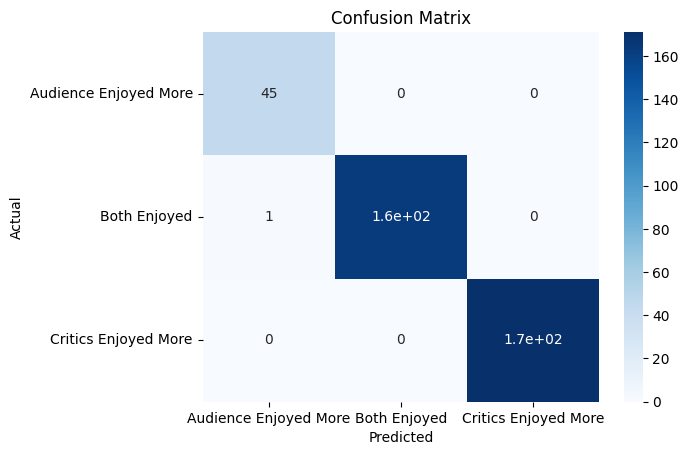

In [381]:
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
sns.heatmap(cm, annot=True, xticklabels=pipeline.classes_, yticklabels=pipeline.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [382]:
results_mr = X_test.copy()
results_mr['class'] = y_test
results_mr['predicted_class'] = y_pred

wrong_predictions = results_mr[results_mr['class'] != results_mr['predicted_class']]

print(wrong_predictions)

     letterboxd_score  rotten_tomatoes_score         class  \
987              49.0                   39.0  Both Enjoyed   

           predicted_class  
987  Audience Enjoyed More  


In [383]:
unlabeled_movies = movie_ratingsML[movie_ratingsML['class'].isna()]
X_unlabeled = unlabeled_movies[features]
movie_ratingsML.loc[unlabeled_movies.index, 'class'] = pipeline.predict(X_unlabeled)


In [388]:
# Drop incorrect data
movie_ratingsML = movie_ratingsML.drop(index=987)
movie_ratingsML

,id,title,year,rated,director,plot,poster,runtime,box_office,rating_id,movie_id,letterboxd_score,rotten_tomatoes_score,score_difference,genre_1,genre_2,genre_3,class
0,1,Barbie,2023,PG-13,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,114.0,636238421,1,1,77.0,88.0,-11.0,Adventure,Comedy,Fantasy,Critics Enjoyed More
1,2,Parasite,2019,R,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,132.0,53847897,2,2,91.0,99.0,-8.0,Drama,Thriller,NaN,Both Enjoyed
2,3,Everything Everywhere All at Once,2022,R,"Daniel Kwan, Daniel Scheinert",A middle-aged Chinese immigrant is swept up in...,https://m.media-amazon.com/images/M/MV5BOWNmMz...,139.0,77191785,3,3,86.0,94.0,-8.0,Action,Adventure,Comedy,Both Enjoyed
3,4,Fight Club,1999,R,David Fincher,An insomniac office worker and a devil-may-car...,https://m.media-amazon.com/images/M/MV5BOTgyOG...,139.0,37030102,4,4,85.0,81.0,4.0,Crime,Drama,Thriller,Both Enjoyed
4,5,La La Land,2016,PG-13,Damien Chazelle,"When Sebastian, a pianist, and Mia, an actress...",https://m.media-amazon.com/images/M/MV5BMzUzND...,128.0,151101803,5,5,82.0,91.0,-9.0,Comedy,Drama,Music,Both Enjoyed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1894,The Wedding Singer,1998,PG-13,Frank Coraci,"Robbie, a singer, and Julia, a waitress, are b...",https://m.media-amazon.com/images/M/MV5BNjU5MG...,97.0,80245725,1894,1894,67.0,72.0,-5.0,Comedy,Music,Romance,Both Enjoyed
1894,1895,"South Park: Bigger, Longer & Uncut",1999,R,Trey Parker,When Eric Cartman and his friends go see an R-...,https://m.media-amazon.com/images/M/MV5BMDcyND...,81.0,52037603,1895,1895,76.0,81.0,-5.0,Animation,Comedy,Fantasy,Both Enjoyed
1895,1896,Reality,2023,TV-MA,Tina Satter,A former American intelligence specialist was ...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,83.0,0,1896,1896,65.0,94.0,-29.0,Drama,NaN,NaN,Critics Enjoyed More
1896,1897,Dr. No,1962,PG,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,110.0,16067035,1897,1897,69.0,95.0,-26.0,Action,Adventure,Thriller,Critics Enjoyed More


In [385]:
movie_ratingsML.to_csv('data/final_movie_data.csv', index=False)  